In [ ]:
! pip install -k kaggle
from google.colab import files
files.upload()


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -k


Saving 0001.png to 0001.png
Saving 0002.png to 0002.png
Saving 0003.png to 0003.png
Saving 0004.png to 0004.png
Saving 0005.png to 0005.png
Saving 0006.png to 0006.png
Saving 0007.png to 0007.png
Saving 0008.png to 0008.png
Saving 0009.png to 0009.png
Saving 0010.png to 0010.png
Saving 0011.png to 0011.png
Saving 0012.png to 0012.png
Saving 0013.png to 0013.png
Saving 0014.png to 0014.png
Saving 0015.png to 0015.png
Saving 0016.png to 0016.png
Saving 0017.png to 0017.png
Saving 0018.png to 0018.png
Saving 0019.png to 0019.png
Saving 0020.png to 0020.png
Saving 0021.png to 0021.png
Saving 0022.png to 0022.png
Saving 0023.png to 0023.png
Saving 0024.png to 0024.png
Saving 0025.png to 0025.png
Saving 0026.png to 0026.png
Saving 0027.png to 0027.png
Saving 0028.png to 0028.png
Saving 0029.png to 0029.png
Saving 0030.png to 0030.png
Saving 0031.png to 0031.png
Saving 0032.png to 0032.png
Saving 0033.png to 0033.png
Saving 0034.png to 0034.png
Saving 0035.png to 0035.png
Saving 0036.png to 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.prepro2cessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
image_path = "/content/0002.png"
img = Image.open(image_path)

In [ ]:
datagen_rotation = ImageDataGenerator(rotation_range=90)

In [ ]:
datagen_horizontal_flip = ImageDataGenerator(horizontal_flip=True)

In [ ]:
datagen_vertical_flip = ImageDataGenerator(vertical_flip=True)

In [ ]:
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)

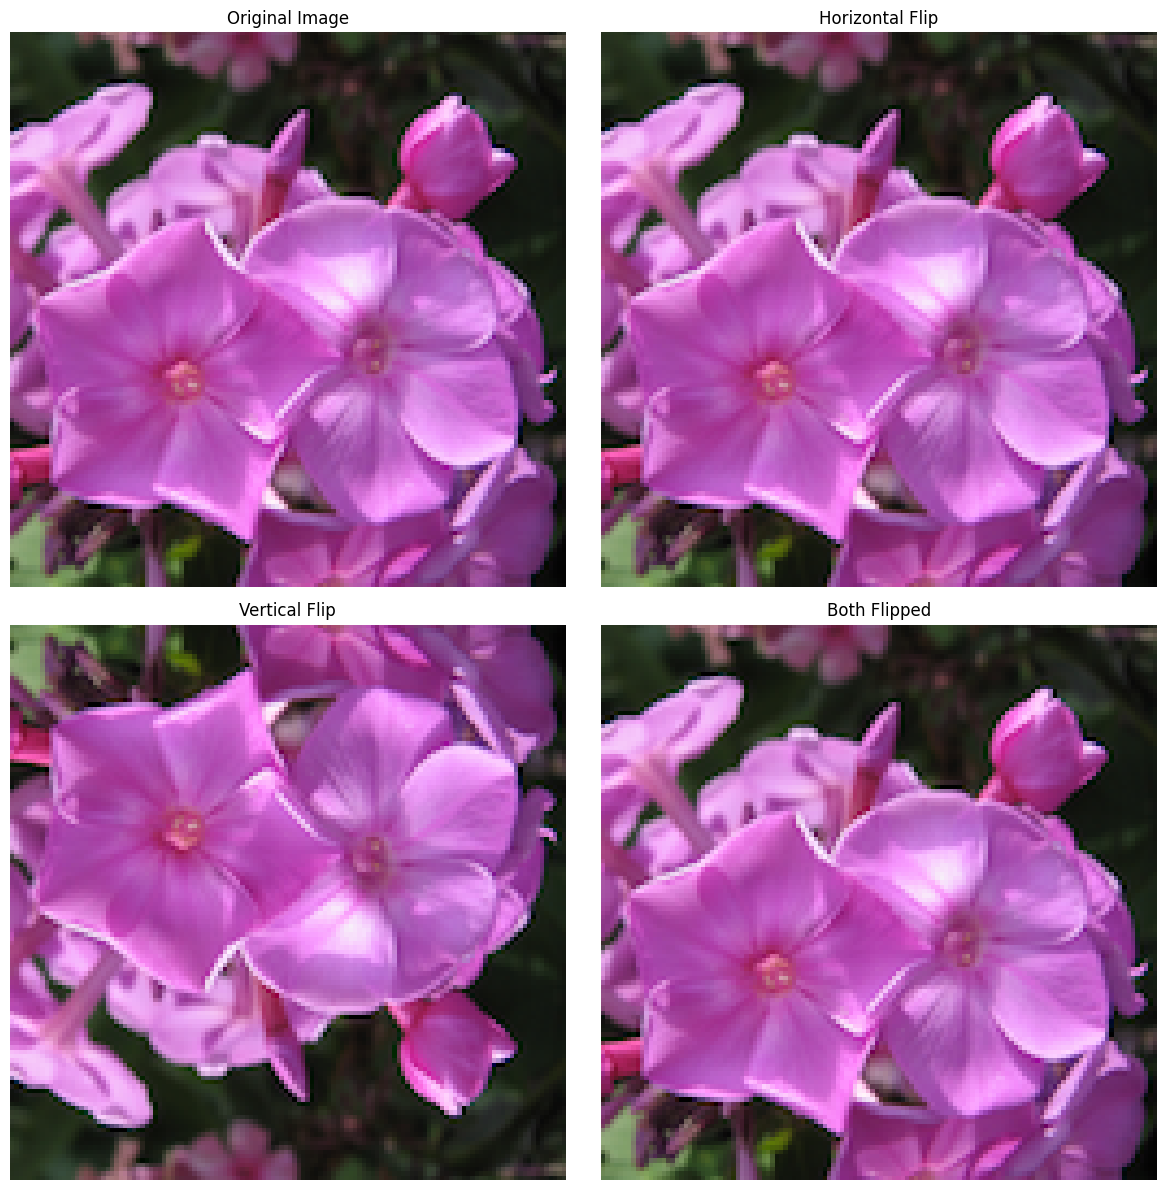

Saved flipped_image_horizontal.png
Saved flipped_image_vertical.png
Saved flipped_image_both.png


In [ ]:
def flip_image(image_array):
    it_h = datagen_horizontal_flip.flow(image_array, batch_size=1)
    it_v = datagen_vertical_flip.flow(image_array, batch_size=1)

    horizontal_flip = next(it_h)[0].astype(np.uint8)
    vertical_flip = next(it_v)[0].astype(np.uint8)

    # Create both horizontal and vertical flip
    both_flip = datagen_vertical_flip.flow(horizontal_flip[np.newaxis, ...], batch_size=1)
    both_flip = next(both_flip)[0].astype(np.uint8)

    return [horizontal_flip, vertical_flip, both_flip]

# Display original and flipped images
def display_images(original, flipped_images):
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs[0, 0].imshow(original[0])
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    titles = ['Horizontal Flip', 'Vertical Flip', 'Both Flipped']
    for i, (ax, img, title) in enumerate(zip(axs.flat[1:], flipped_images, titles)):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Generate flipped images
flipped_images = flip_image(img_array)

# Display the original and flipped images
display_images(img_array, flipped_images)

# Optionally, save the flipped images
flip_types = ['horizontal', 'vertical', 'both']
for flip_type, flipped_img in zip(flip_types, flipped_images):
    Image.fromarray(flipped_img).save(f'flipped_image_{flip_type}.png')
    print(f"Saved flipped_image_{flip_type}.png")

<ipython-input-35-4c4095d06aa7>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


NameError: name 'augmented' is not defined

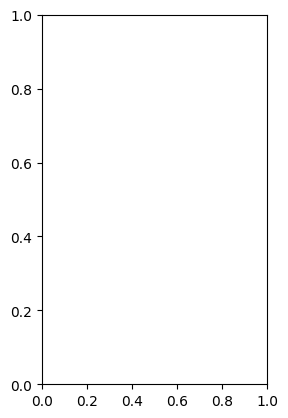

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

def show_images(original, augmented, title):
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.imshow(original)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented)
plt.title(title)
plt.axis('off')

plt.show()